# Week 3. In-Class Practice

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("../91APPdataset/Orders.csv")

/home/kevin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.tail(3).T

,5495273,5495274,5495275
DateId,20170329,20170329,20170329
MemberId,1905124,1905124,975582
OrderGroupCode,b'\x80f\xa0oIM\xc6\xb5K\x141\x9b\xa3\\\x1f\x18...,b'\x80f\xa0oIM\xc6\xb5K\x141\x9b\xa3\\\x1f\x18...,b'y\x84\xe7\x07\x8f \xda\xa10\x8ez\xf3\xc2\x86...
TrackSourceTypeDef,iOSApp,iOSApp,iOSApp
TrackDeviceTypeDef,Mobile,Mobile,Mobile
PayProfileTypeDef,CreditCardOnce,CreditCardOnce,Family
SalesOrderSlaveId,31990500,31990501,31990559
SalePageId,1922985,3026918,3073649
IsMajor,True,True,True
IsGift,False,False,False


In [15]:
data['DateId'] = pd.to_datetime(data['DateId'], format='%Y%m%d')
data['Weekday'] = data['DateId'].apply(lambda x: x.dayofweek)

In [19]:
day_quantity = data.groupby('Weekday')['Quantity'].sum().reset_index(name='Quantity')
day_quantity['Weekday'] = day_quantity['Weekday'] + 1
day_quantity

,Weekday,Quantity
0,1,750079
1,2,827454
2,3,836489
3,4,773765
4,5,743191
5,6,817931
6,7,859920


## Matplotlib

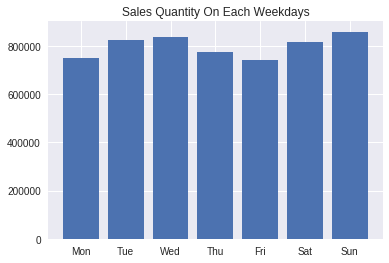

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(day_quantity['Weekday'], day_quantity['Quantity'])
ax.xaxis.set(ticks=range(1,8), ticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax.set(title="Sales Quantity On Each Weekdays")


## Seaborn

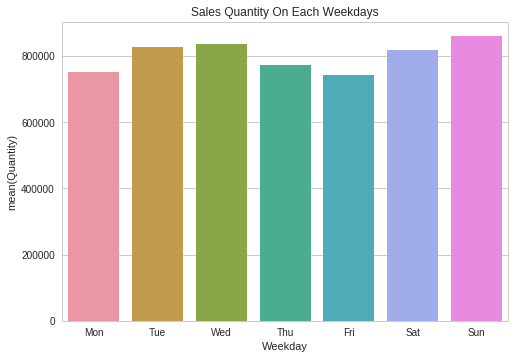

In [43]:
sns.set(style="whitegrid", color_codes=True)
g = sns.barplot(x='Weekday', y='Quantity', data=day_quantity)
g.set(xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("Sales Quantity On Each Weekdays")